In [1]:
'''
Author: Kayla Barginda 

Barnes Interpolation for 1D simulated data (preliminary function,
for testing only)
'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os
from scipy.optimize import curve_fit

import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcdefaults()
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
x = np.linspace(-100, 100, 201) #create linspace for 1D data

ground_truth = 3 * np.exp(-1 * (x-20)**2 / 40**2) + 0.01 * x #random bell-curve style function

In [3]:
def createTiles(x, values, no_of_tiles): #creates simulated satellite tiles
    tiling = [int((i+1) * len(x)/no_of_tiles) for i in range(no_of_tiles - 1)]
    bounds = [0] + tiling + [len(x)]
    centres = [np.mean(x[bounds[i]:bounds[i+1]]) for i in range (no_of_tiles)]
    tile_values = [np.mean(values[bounds[i]:bounds[i+1]]) for i in range (no_of_tiles)]
    
    value_array = np.zeros(x.shape)
    print(bounds)
    for i in range(len(bounds)-1):
        value_array[bounds[i]:bounds[i+1]] = tile_values[i]
    
    return centres, tile_values, value_array

In [4]:
def barnesInterpol_1D(x, points_x, points_y, tiles_x, tiles_y, k_point = None, k_tile = None, relative_tileWeight = None):
    points_x = np.asarray(points_x)
    points_y = np.asarray(points_y)
    tiles_x = np.asarray(tiles_x)
    tiles_y = np.asarray(tiles_y)
    
    if k_point == None: 
        k_point = 20**2
    if k_tile == None: 
        k_tile = 200**2
    if relative_tileWeight == None: 
        relative_tileWeight = 0.2
    
    #set weights
    point_weights = np.asarray([np.exp(-1 * (x - xpos)**2 / k_point) for xpos in points_x])
    tile_weights = np.asarray([relative_tileWeight * np.exp(-1 * (x - xpos)**2 / k_tile) for xpos in tiles_x])
                               
    #multiply weights with measured values
    weighted_pointValues = np.matmul(np.diag(points_y), point_weights)
    summed_weighted_pointValues = np.sum(weighted_pointValues, axis = 0)
    
    weighted_tileValues = np.matmul(np.diag(tiles_y), tile_weights)
    summed_weighted_tileValues = np.sum(weighted_tileValues, axis = 0)
    
    interpol = (summed_weighted_pointValues + summed_weighted_tileValues) / (np.sum(point_weights, axis = 0) + np.sum(tile_weights, axis = 0))
    
    return interpol         

In [5]:
#indices = [21, 32, 41, 57, 68, 119, 126, 134, 159, 161, 170]
indices = [21, 41, 126, 176]
points_x = [x[i] for i in indices]
points_y = [ground_truth[i] for i in indices]

no_of_tiles = 3
centres, tile_values, value_array = createTiles(x, ground_truth, no_of_tiles)

[0, 67, 134, 201]


In [6]:
points_xRand = [x[i] for i in indices]
randLevel = 0.1

#gives random no. normal distribution, multiply by 0.1 for a deviation of 10% from the real value --> creates noisy data
points_yRand = [ground_truth[i]*(1 + randLevel * np.random.normal()) for i in indices] 
print(points_yRand)
print(points_y)

[-0.9938232124817742, -0.5053628568650607, 2.355416895246263, 0.9917257868279692]
[-0.7834416269098319, -0.5293122073885232, 3.1932537115800086, 1.182575262763135]


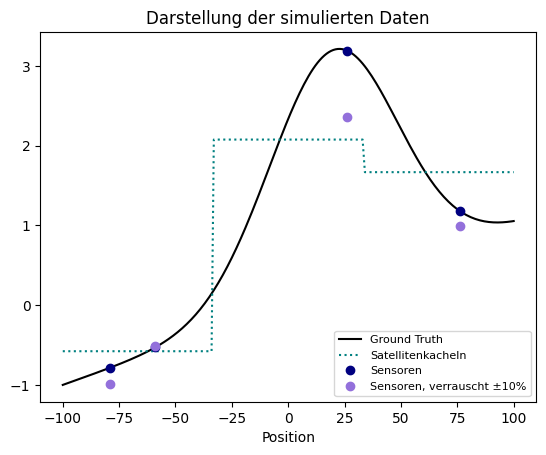

In [7]:
plt.plot(x, ground_truth, color = 'k', label = 'Ground Truth')
plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkacheln')
plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')

plt.plot(points_x, points_yRand, color = 'mediumpurple', ls = '', marker = 'o', label = 'Sensoren, verrauscht ±10%')

plt.legend(prop={'size': 8}, loc = 4)
plt.xlabel('Position')
plt.title('Darstellung der simulierten Daten')
plt.savefig('simulatedTruth.pdf')

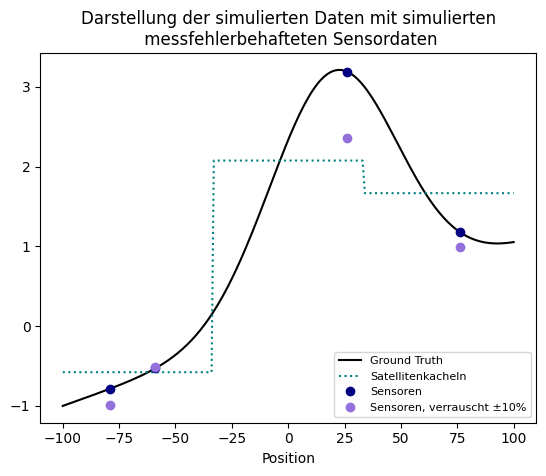

In [8]:
plt.plot(x, ground_truth, color = 'k', label = 'Ground Truth')
plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkacheln')
plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')

plt.plot(points_x, points_yRand, color = 'mediumpurple', ls = '', marker = 'o', label = 'Sensoren, verrauscht ±10%')

plt.legend(prop={'size': 8}, loc = 4)
plt.xlabel('Position')
plt.title('Darstellung der simulierten Daten mit simulierten\n messfehlerbehafteten Sensordaten')
plt.savefig('simulatedTruth_rand.pdf')

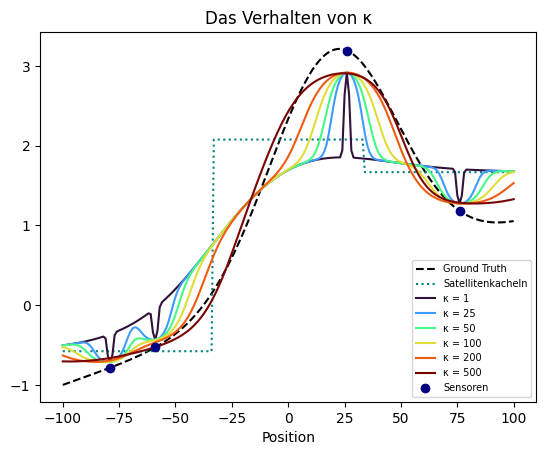

In [9]:
#Simple loop to show how how Kappa behaves for different values of k
k_tiles = 50**2
relative_tileWeight = 0.2

plt.plot(x, ground_truth, color = 'k',ls ='--', label = 'Ground Truth')
plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkacheln')

colours = [cm.turbo(0.2 * i) for i in range(6)]

k_points = [1**2, 25, 50, 100, 200, 500]

for i in range(len(k_points)): 
    kp = k_points[i]
    interpolation = barnesInterpol_1D(x, points_x, points_y, centres, tile_values, k_point = kp, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)
    plt.plot(x, interpolation, color = colours[i], label = 'κ = ' +str(kp), ls = '-')
    
plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')
plt.xlabel('Position')
plt.title('Das Verhalten von κ')

plt.legend(prop={'size': 7}, loc = 4)
#plt.savefig('kappa.pdf')

[0, 67, 134, 201]


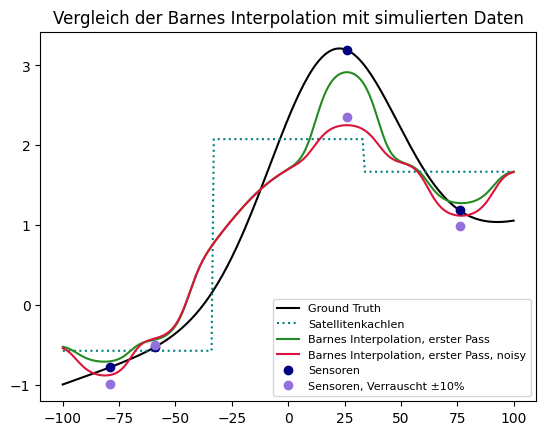

In [10]:
k_points = 10**2
k_tiles = 50**2
relative_tileWeight = 0.2
no_of_tiles = 3

centres, tile_values, value_array = createTiles(x, ground_truth, no_of_tiles)

interpolationRand = barnesInterpol_1D(x, points_x, points_yRand, centres, tile_values, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)
interpolation = barnesInterpol_1D(x, points_x, points_y, centres, tile_values, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)

plt.plot(x, ground_truth, color = 'k', label = 'Ground Truth')
plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkachlen')

plt.plot(x, interpolation, color = 'forestgreen', label = 'Barnes Interpolation, erster Pass')
plt.plot(x, interpolationRand, color = 'crimson', label = 'Barnes Interpolation, erster Pass, noisy')

plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')
plt.plot(points_x, points_yRand, color = 'mediumpurple', ls = '', marker = 'o', label = 'Sensoren, Verrauscht ±10%')

plt.title('Vergleich der Barnes Interpolation mit simulierten Daten')
plt.legend(prop={'size': 8}, loc = 4)
#plt.savefig('simulatedCompare.pdf')


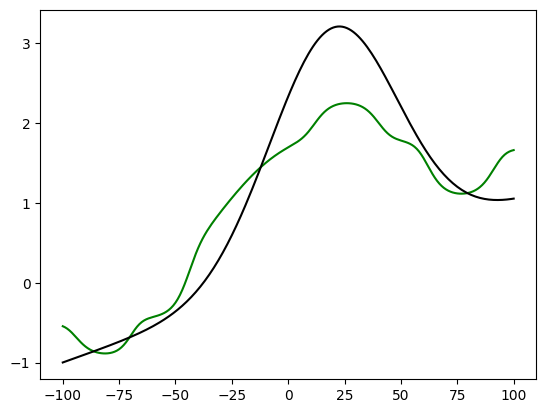

In [11]:
firstPass = barnesInterpol_1D(x, points_x, points_y, centres, tile_values, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)
firstPass_rand = barnesInterpol_1D(x, points_x, points_yRand, centres, tile_values, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)

plt.plot(x, firstPass_rand, color = 'g', label = 'barnes')
plt.plot(x, ground_truth, color = 'k')

In [12]:
def secondPass(x, firstPass, points_x, points_y, tiles_x, tiles_y, g, k_point = None, k_tile = None, relative_tileWeight = None):
    corrected = np.linspace(0, 0, len(x)) + firstPass
    
    for i in range(len(points_x)): 
        difference = points_y[i] - corrected[np.argmin(np.abs(x - points_x[i]))]
        corrected += (1. - relative_tileWeight) * difference * np.exp(-1 * (x - points_x[i])**2 / (g * k_point))
                   
    for i in range(len(tiles_x)): 
        difference = tiles_y[i] - corrected[np.argmin(np.abs(x - tiles_x[i]))]
        corrected += relative_tileWeight * difference * np.exp(-1 * (x - tiles_x[i])**2 / (g * k_tile))
        
    return corrected

In [13]:
sp = secondPass(x, firstPass, points_x, points_y, centres, tile_values, g = 0.2, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)

#to show the behaviour of the second pass with noisy data
sp_rand = secondPass(x, firstPass_rand, points_x, points_yRand, centres, tile_values, g = 0.2, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)

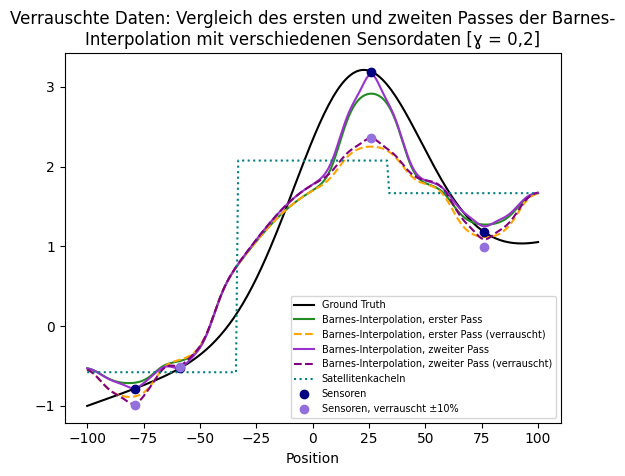

In [14]:
plt.plot(x, ground_truth, color = 'k', label = 'Ground Truth')
plt.plot(x, firstPass, color = 'forestgreen', label = 'Barnes-Interpolation, erster Pass')
plt.plot(x, firstPass_rand, color = 'orange', ls = '--', label = 'Barnes-Interpolation, erster Pass (verrauscht)')

plt.plot(x, sp, color = 'darkorchid', label = 'Barnes-Interpolation, zweiter Pass')
plt.plot(x, sp_rand, color = 'purple', ls = '--', label = 'Barnes-Interpolation, zweiter Pass (verrauscht)')

plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkacheln')
plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')
plt.plot(points_x, points_yRand, color = 'mediumpurple', ls = '', marker = 'o', label = 'Sensoren, verrauscht ±10%')

plt.legend(prop={'size': 7}, loc = 4)
plt.title('Verrauschte Daten: Vergleich des ersten und zweiten Passes der Barnes-\nInterpolation mit verschiedenen Sensordaten [ɣ = 0,2]')
plt.xlabel('Position')

plt.savefig('barnesSecondpass02_rand.pdf')

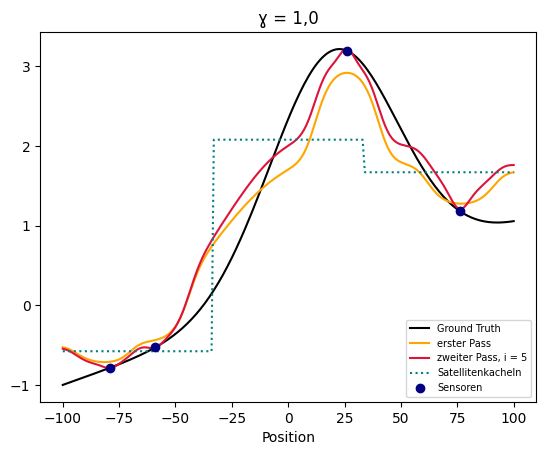

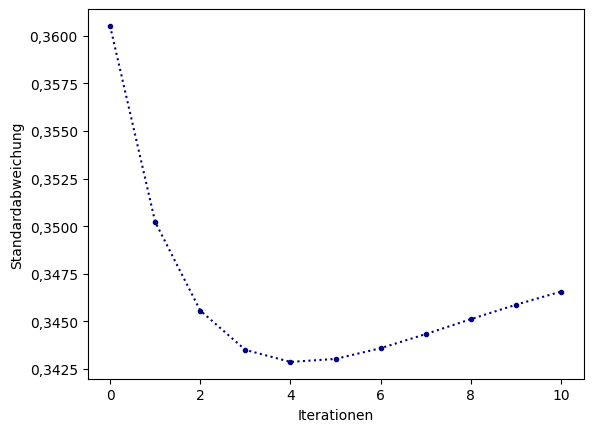

0.3428733438467406
0.36052057829356393
[0.36052057829356393, 0.350226491763617, 0.34557192458165925, 0.34350586990833815, 0.3428733438467406, 0.343030865484814, 0.3435940879692974, 0.3443342363592008, 0.34511898379175204, 0.34587555392569935, 0.34656736372287]


In [15]:
plt.plot(x, ground_truth, color = 'k', label = 'Ground Truth')
plt.plot(x, firstPass, color = 'orange', label = 'erster Pass')

c = sp
quality = [np.mean((ground_truth - sp)**2)**0.5]

for i in range(10):
    c = secondPass(x, c, points_x, points_y, centres, tile_values, g = 0.5, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)
    quality.append(np.mean((ground_truth - c)**2)**0.5)
    if i == 5:
        plt.plot(x, c, color = 'crimson', label = 'zweiter Pass, i = 5')
    if i == 10:
        plt.plot(x, c, color = 'blue', label = 'zweiter Pass, i = 10')
    if i == 20:
        plt.plot(x, c, color = 'forestgreen',label = 'zweiter Pass, i = 20')
        
plt.plot(x, value_array, color = 'teal', ls = ':', label = 'Satellitenkacheln')
plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', label = 'Sensoren')
#plt.plot(points_x, points_yRand, color = 'mediumpurple', ls = '', marker = 'o', label = 'Sensoren, verrauscht ±10%')

plt.legend(prop={'size': 7}, loc = 4)
#plt.title('Vergleich der Barnes-Interpolation mit simulierten\n messfehlerbehafteten Sensordaten [ɣ = 0,2]')
plt.title('ɣ = 1,0')
plt.xlabel('Position')
plt.savefig('secondpassvergleich1.pdf')

plt.show()

plt.plot(quality, marker = '.', ls = ':', color = 'navy')
plt.xlabel('Iterationen')
plt.ylabel('Standardabweichung')
#plt.title('Standardabweichung der Barnes-Interpolation\n mit simulierten Daten [ɣ = 1]')
#plt.title('Standardabweichung [ɣ = 0,3]')
#plt.savefig('standDevBarnes3.pdf')
plt.show()

print(np.min(quality))
print(np.max(quality))
print(quality)

In [16]:

def testNoiseInfluence(rand_level = 0.1, max_iterations = 20, statisticRuns = 100):
    qualitiesArrays = [[] for i in range(max_iterations+1)]
    
    # Draw many realisations of the noisy data and perform the interpolation; after each iteration, save the current the quality
    for statIteration in range(statisticRuns):
        points_yRand = [ground_truth[i]*(1 + rand_level * np.random.normal()) for i in indices]
        firstPass_rand = barnesInterpol_1D(x, points_x, points_yRand, centres, tile_values, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)

        c = firstPass_rand
        qualitiesArrays[0].append(np.mean((ground_truth - c)**2)**0.5)

        for j in range(max_iterations):
            c = secondPass(x, c, points_x, points_y, centres, tile_values, g = 0.2, k_point = k_points, k_tile = k_tiles, relative_tileWeight = relative_tileWeight)
            qualitiesArrays[j+1].append(np.mean((ground_truth - c)**2)**0.5)
    rms = np.asarray([np.mean(qualitiesArrays[i]) for i in range(len(qualitiesArrays))])
    stds = np.asarray([np.std(qualitiesArrays[i]) for i in range(len(qualitiesArrays))])
    return rms, stds

Text(0.5, 0, 'Barnes Iterations')

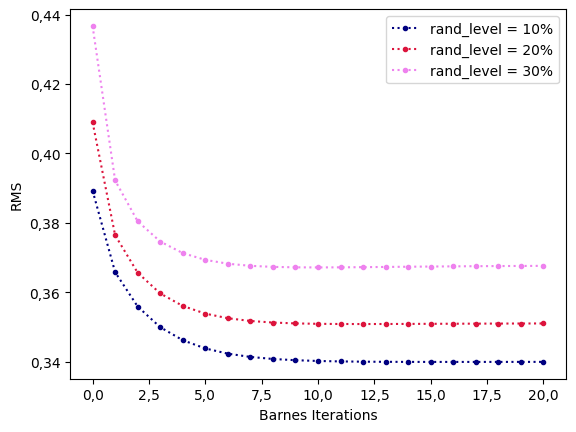

In [17]:
rms, _ = testNoiseInfluence(0.1, max_iterations = 20, statisticRuns = 100)
plt.plot(rms, color = 'navy', marker = '.', ls=':', label = 'rand_level = 10%')

rms, _ = testNoiseInfluence(0.2, max_iterations = 20, statisticRuns = 100)
plt.plot(rms, color = 'crimson', marker = '.', ls=':', label = 'rand_level = 20%')

rms, _ = testNoiseInfluence(0.3, max_iterations = 20, statisticRuns = 100)
plt.plot(rms, color = 'violet', marker = '.', ls=':', label = 'rand_level = 30%')

plt.legend()
plt.ylabel('RMS')
plt.xlabel('Barnes Iterations')

In [18]:
rms, stds = testNoiseInfluence(0.1, maxIterations = 20, statisticRuns = 100)
iteration = np.linspace(0, len(rms)-1, len(rms))
plt.errorbar(iteration, rms, yerr = stds, color = 'navy', marker = '.', ls=':', label = 'Noisy lvl = 0.1')

rms, stds = testNoiseInfluence(0.2, maxIterations = 20, statisticRuns = 100)
iteration = np.linspace(0, len(rms)-1, len(rms))
plt.errorbar(iteration+0.1, rms, yerr = stds, color = 'crimson', marker = '.', ls=':', label = 'Noisy lvl = 0.2')

rms, stds = testNoiseInfluence(0.3, maxIterations = 20, statisticRuns = 100)
iteration = np.linspace(0, len(rms)-1, len(rms))
plt.errorbar(iteration-0.1, rms, yerr = stds, color = 'violet', marker = '.', ls=':', label = 'Noisy lvl = 0.3')

plt.legend()
plt.ylabel('RMS')
plt.xlabel('Iterationen')

TypeError: testNoiseInfluence() got an unexpected keyword argument 'maxIterations'

In [ ]:
rms3, stds3 = testNoiseInfluence(0.3, maxIterations = 10, statisticRuns = 100)
iteration3 = np.linspace(0, len(rms3)-1, len(rms3))
#plt.plot(rms3, color = 'g', marker = 'o', ls=':', label = 'randlevel = 0.3')
plt.fill_between(iteration3, rms3-stds3, rms3+stds3, color = 'paleturquoise', label = 'Fehlerbereich (30%)')

rms2, stds2 = testNoiseInfluence(0.2, maxIterations = 10, statisticRuns = 100)

iteration2 = np.linspace(0, len(rms2)-1, len(rms2))
#plt.plot(rms2, color = 'r', marker = 'o', ls=':', label = 'randlevel = 0.2')
plt.fill_between(iteration2, rms2-stds2, rms2+stds2, color = 'mistyrose', label = 'Fehlerbereich (20%)')

rms1, stds1 = testNoiseInfluence(0.1, maxIterations = 10, statisticRuns = 100)
iteration1 = np.linspace(0, len(rms1)-1, len(rms1))
#plt.plot(iteration1, rms1, color = 'k', marker = 'o', ls=':', label = 'randlevel = 0.1')
plt.fill_between(iteration1, rms1-stds1, rms1+stds1, color = 'papayawhip', label = 'Fehlerbereich (10%)')


plt.plot(iteration1, rms1, color = 'darkorange', marker = '.', ls=':', label = '10% verrauscht')
plt.plot(rms2, color = 'maroon', marker = '.', ls=':', label = '20% verrauscht')
plt.plot(rms3, color = 'navy', marker = '.', ls=':', label = '30% verrauscht')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 5, 4, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], prop={'size': 8}, loc = 1, ncol=2) 
plt.title('Durchschnittlicher RMSE des zweiten Barnes-\nInterpolationspasses für verrauschte Daten')
plt.ylabel('RMSE')
plt.xlabel('Anzahl der Iterationen des 2. Barnes-Interpolationspasses')
plt.savefig('RMS.pdf')